In [101]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

%matplotlib inline

In [2]:
# Url de la web
str='https://www.imdb.com/chart/top?ref_=nv_mv_250'

# Recuperamos la información correspondiente a la respuesta de la petición
page = requests.get(str)

In [4]:
# Guardamos el contenido parseado
soup = BeautifulSoup(page.content)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [26]:
# Creamos unas variables donde seleccionamos un trozo del html
listaPeliculas=soup.find_all('td',class_='titleColumn')
listaNotas=soup.find_all('td',class_='ratingColumn imdbRating')

In [132]:
# Creamos listas vacias y guardamos la informacion del html que nos interesa
peli=[]
año=[]
nota=[]
for i in listaPeliculas:
     peli.append(i.a.string),
     año.append(int(i.span.string[1:5]))
for j in listaNotas:
    nota.append(float(j.strong.string))

In [133]:
# Creamos el dataFrame a partir de las listas que hemos creado anteriormente
df=pd.DataFrame({'Title':peli,'Year':año, 'Nota':nota})
df.head()

,Nota,Title,Year
0,9.2,Cadena perpetua,1994
1,9.2,El padrino,1972
2,9.0,El padrino: Parte II,1974
3,9.0,El caballero oscuro,2008
4,8.9,12 hombres sin piedad,1957


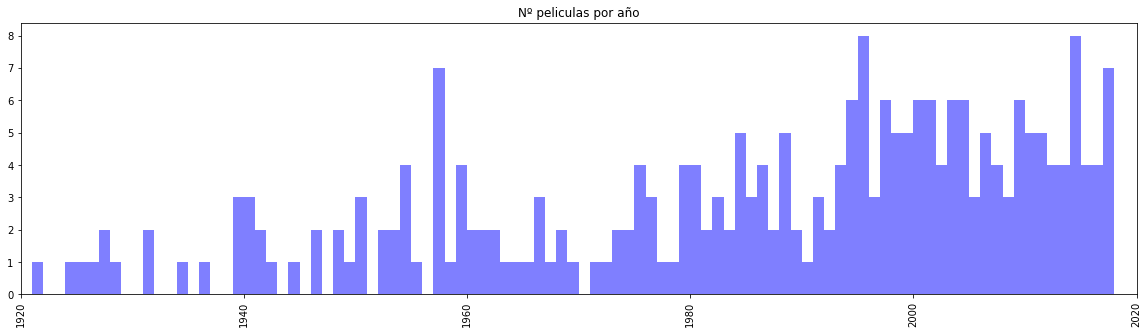

In [137]:
# Graficamos los resultados por años
bins=max(df['Year'])-min(df['Year'])
plt.figure(figsize=(20,5))
plt.xlim(1920,2020,1)
plt.title('Nº peliculas por año')
plt.xticks(rotation='vertical')
plt.hist(df['Year'],bins=bins,facecolor='blue',alpha=.5)
plt.show()

In [135]:
# Guardar en csv
df.to_csv('top_250_peliculas.csv',index = None, header=True)